In [27]:
import pandas as pd

# Dataset
data = pd.read_csv("C:/Users/yacoo/lulc-air-quality/dataset/california-eleven-month-mol-m2.csv")

NO2_column_number_density
(7.81e-05, 0.000144]    415395
(0.000144, 0.00021]     344782
(0.00021, 0.000276]     167999
(0.000276, 0.000342]     90570
(0.000342, 0.000408]     29829
Name: count, dtype: int64


<Axes: >

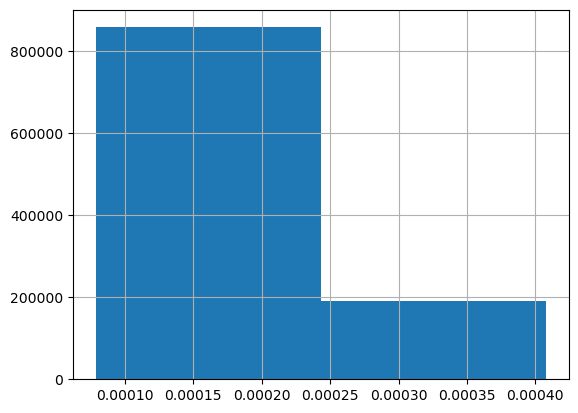

In [28]:
# Just to understand the dist. more
bins = pd.cut(data['NO2_column_number_density'], 5)
print(bins.value_counts(sort=False))
# Visually showing what it would mean to discretize the bins into categorical attributes
data['NO2_column_number_density'].hist(bins=2)

In [29]:
# Discretize the attributes using equal width method
# The big caveat is that the density levels are low, medium, high, etc. RESPECTIVE to the dist. of the dataset
data['NO2_column_number_density'] = pd.cut(x=data['NO2_column_number_density'], labels=["Extremely Low NO2 Levels", "Low NO2 Levels", "Medium NO2 Levels", "High NO2 Levels", "Extremely High NO2 Levels"], bins=5)

print(data['NO2_column_number_density'].head(100))

0     Extremely High NO2 Levels
1     Extremely High NO2 Levels
2     Extremely High NO2 Levels
3     Extremely High NO2 Levels
4     Extremely High NO2 Levels
                ...            
95    Extremely High NO2 Levels
96    Extremely High NO2 Levels
97    Extremely High NO2 Levels
98    Extremely High NO2 Levels
99    Extremely High NO2 Levels
Name: NO2_column_number_density, Length: 100, dtype: category
Categories (5, object): ['Extremely Low NO2 Levels' < 'Low NO2 Levels' < 'Medium NO2 Levels' < 'High NO2 Levels' < 'Extremely High NO2 Levels']


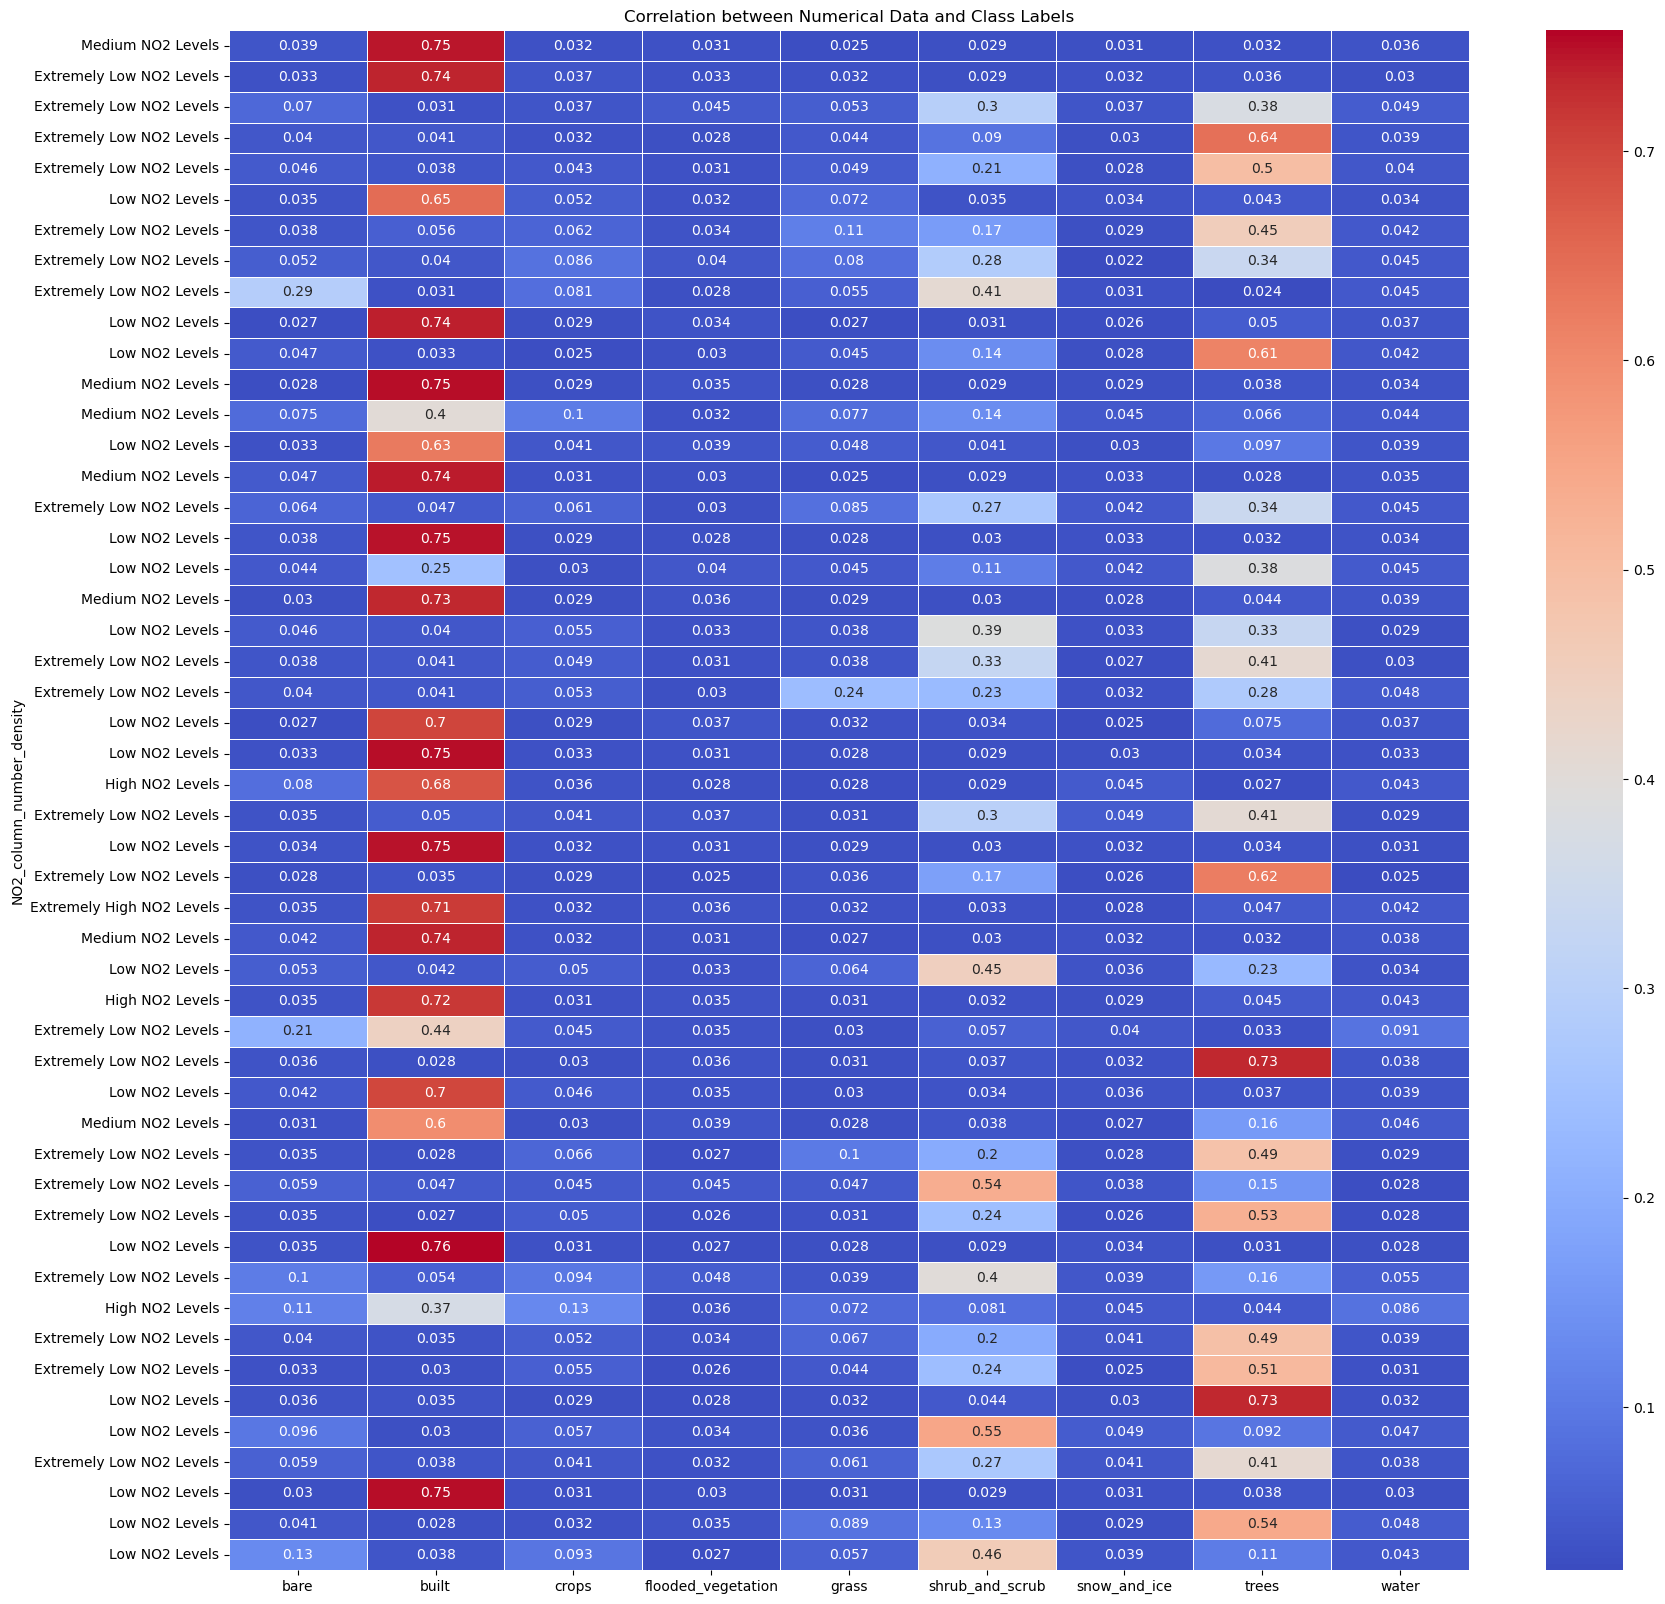

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sample = data.sample(n=50) 

sample.set_index('NO2_column_number_density', inplace=True)
# sample = sample.sort_index()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(sample, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between Numerical Data and Class Labels')
plt.show()


In [31]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:               bare     built     crops  flooded_vegetation     grass  \
0        0.118978  0.615780  0.037095            0.032246  0.024238   
1        0.073208  0.659635  0.035133            0.036534  0.027986   
2        0.107143  0.622934  0.034605            0.034709  0.026477   
3        0.178386  0.527489  0.035730            0.033653  0.023553   
4        0.200875  0.475577  0.036696            0.037724  0.024319   
...           ...       ...       ...                 ...       ...   
1048570  0.076766  0.033344  0.065253            0.027162  0.049053   
1048571  0.049924  0.031947  0.042694            0.026498  0.051327   
1048572  0.052321  0.036046  0.059906            0.027036  0.055809   
1048573  0.062802  0.039303  0.091280            0.024556  0.058972   
1048574  0.058334  0.036734  0.104522            0.023938  0.061921   

         shrub_and_scrub  snow_and_ice     trees     water  
0               0.052000      0.033205  0.030157  0.051107  
1     

In [32]:
# Imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
# class_weights_custom = {"Extremely Low": 0.05, "Very Low": 0.80, "Low": 1, "Medium": .80, "High": 0.60, "Very High": 0.30, "Extremely High": 0.50}

# DTC
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features=None, class_weight=None)

# Train the model
dtc.fit(X_train, y_train)

# Predictions on the test set
y_pred = dtc.predict(X_test)

cross_val_scores = cross_val_score(dtc, X_train, y_train, cv=5, scoring='accuracy')

# Eval
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [33]:
print("Accuracy: ", accuracy)
print(report)

# Cross validation
print(f'CV Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean()}')

Accuracy:  0.6103473762010347
                           precision    recall  f1-score   support

Extremely High NO2 Levels       0.38      0.00      0.00      6017
 Extremely Low NO2 Levels       0.72      0.89      0.80     83454
          High NO2 Levels       0.42      0.37      0.39     18066
           Low NO2 Levels       0.55      0.54      0.55     68702
        Medium NO2 Levels       0.43      0.30      0.35     33476

                 accuracy                           0.61    209715
                macro avg       0.50      0.42      0.42    209715
             weighted avg       0.58      0.61      0.59    209715

CV Scores: [0.60859977 0.61031042 0.6110972  0.61124025 0.61101972]
Mean CV Accuracy: 0.6104534725699163


C:\Users\yacoo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


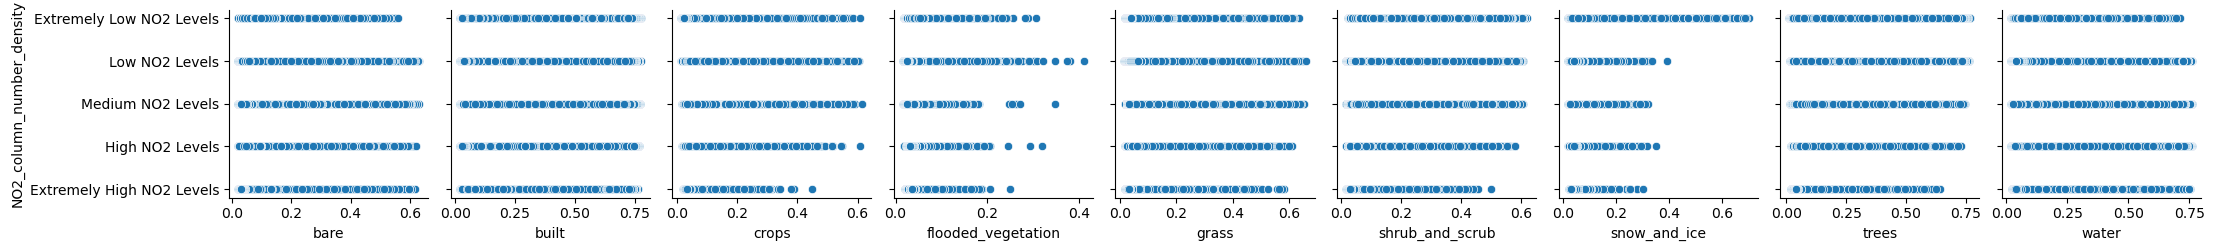

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the relationship between air quality attr. related to the LULC class labels
sns.pairplot(data, x_vars=['bare', 'built', 'crops', 'flooded_vegetation', 'grass', 'shrub_and_scrub', 'snow_and_ice', 'trees', 'water'], y_vars='NO2_column_number_density', kind='scatter')
plt.show()

In [38]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:               bare     built     crops  flooded_vegetation     grass  \
0        0.118978  0.615780  0.037095            0.032246  0.024238   
1        0.073208  0.659635  0.035133            0.036534  0.027986   
2        0.107143  0.622934  0.034605            0.034709  0.026477   
3        0.178386  0.527489  0.035730            0.033653  0.023553   
4        0.200875  0.475577  0.036696            0.037724  0.024319   
...           ...       ...       ...                 ...       ...   
1048570  0.076766  0.033344  0.065253            0.027162  0.049053   
1048571  0.049924  0.031947  0.042694            0.026498  0.051327   
1048572  0.052321  0.036046  0.059906            0.027036  0.055809   
1048573  0.062802  0.039303  0.091280            0.024556  0.058972   
1048574  0.058334  0.036734  0.104522            0.023938  0.061921   

         shrub_and_scrub  snow_and_ice     trees     water  
0               0.052000      0.033205  0.030157  0.051107  
1     

In [39]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
# class_weights_custom = {"Extremely Low": 0.05, "Very Low": 0.80, "Low": 1, "Medium": .80, "High": 0.60, "Very High": 0.30, "Extremely High": 0.50}

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions for class labels
y_pred = rf_clf.predict(X_test)

cross_val_scores = cross_val_score(dtc, X_train, y_train, cv=5, scoring='accuracy')

# Eval
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [40]:
print("Accuracy: ", accuracy)
print(report)

# Cross validation
print(f'CV Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean()}')

Accuracy:  0.6371981021863005
                           precision    recall  f1-score   support

Extremely High NO2 Levels       0.38      0.10      0.16      6017
 Extremely Low NO2 Levels       0.75      0.88      0.81     83454
          High NO2 Levels       0.44      0.39      0.41     18066
           Low NO2 Levels       0.59      0.59      0.59     68702
        Medium NO2 Levels       0.46      0.35      0.40     33476

                 accuracy                           0.64    209715
                macro avg       0.52      0.46      0.47    209715
             weighted avg       0.61      0.64      0.62    209715

CV Scores: [0.60859977 0.61031638 0.61109124 0.61124622 0.61102568]
Mean CV Accuracy: 0.6104558567579812


In [41]:
# Determining what attr. hold % of class labels
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

built                 0.151622
shrub_and_scrub       0.145687
trees                 0.118840
water                 0.108379
grass                 0.100853
flooded_vegetation    0.097229
bare                  0.095049
crops                 0.093106
snow_and_ice          0.089235
dtype: float64


In [98]:
!pip install lazypredict

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.3 MB 5.9 MB/s eta 0:00:01
   ---------------------- ----------------- 0.7/1.3 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 11.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
    --------------------------------------- 1.3/99.8 MB 26.6 MB/s eta 0:00:04
    --------------------------------------- 2.4/99.8 MB 31.1 MB/

In [29]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [20:59<00:25, 25.56s/it]

[LightGBM] [Info] Number of positive: 32175, number of negative: 33527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 65702, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489711 -> initscore=-0.041161
[LightGBM] [Info] Start training from score -0.041161


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [21:00<00:00, 43.47s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.91               0.91    None      0.91   
LGBMClassifier                     0.90               0.90    None      0.90   
ExtraTreesClassifier               0.90               0.90    None      0.90   
SVC                                0.90               0.90    None      0.90   
BaggingClassifier                  0.90               0.90    None      0.90   
AdaBoostClassifier                 0.89               0.89    None      0.89   
KNeighborsClassifier               0.89               0.89    None      0.89   
LogisticRegression                 0.89               0.89    None      0.89   
LinearSVC                          0.89               0.89    None      0.89   
LinearDiscriminantAnalysis         0.89               0.89    None      0.89   
RidgeClassifier                    0.89 